# 1) 데이터 읽기

Pregnancies: 임신 횟수입니다.
환자가 과거에 몇 번 임신했는지를 나타냅니다.  

Glucose:혈당 수치입니다.
공복 상태에서 측정된 혈당 농도 (mg/dL 단위)를 나타냅니다. 당뇨병 진단의 중요한 지표입니다.  

BloodPressure: 혈압입니다.
이 데이터에서는 이완기 혈압 (mm Hg) 값을 나타냅니다. 이완기 혈압은 심장이 쉬는 동안의 혈압입니다.  

SkinThickness: 피부 두께입니다.
삼두근 피부 두께를 측정한 값으로, 일반적으로 피하 지방량을 나타내기 위해 사용됩니다. mm 단위입니다.  

Insulin:인슐린 수치입니다.
공복 상태에서 측정된 혈청 인슐린 수치 (mu U/ml 단위)를 나타냅니다. 인슐린 수치는 당 대사와 관련이 깊고, 당뇨병 환자의 중요한 생리적 특성입니다.  

BMI (Body Mass Index): 체질량지수입니다.
체중(kg)을 신장(m)의 제곱으로 나눈 값으로, 비만도 혹은 체중 상태를 나타냅니다. BMI = 체중(kg) / (신장(m))². 일반적으로 BMI가 높을수록 당뇨병 발생 위험이 증가합니다.  

DiabetesPedigreeFunction:당뇨병 가족력 지수입니다.
가족 중 당뇨병을 앓은 사람의 비율을 고려하여 계산된 값으로, 유전적 영향을 측정하는 지표입니다. 값이 높을수록 당뇨병 가족력이 크다는 의미입니다.  

Age: 나이입니다.
환자의 연령을 나타냅니다. 나이가 많을수록 당뇨병의 발병 확률이 높아집니다.  

Outcome: 당뇨병 여부입니다.
이진 변수로, 1은 당뇨병 환자, 0은 비당뇨병 환자를 의미합니다.  

In [85]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2) 결측치 확인

In [86]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3) 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'Diabetes or NOt')

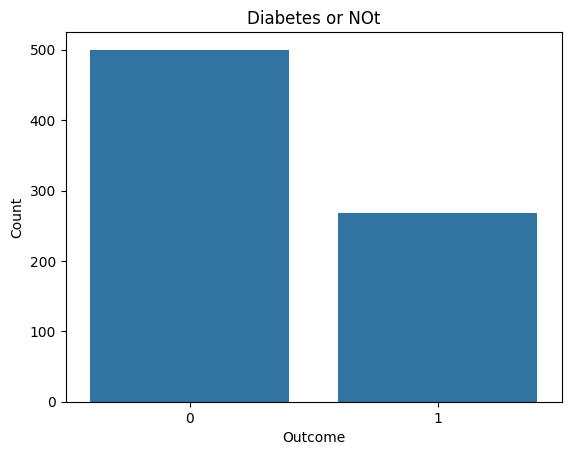

In [87]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Diabetes or NOt")

In [88]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 5) X, Y 나누기

In [89]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

print(X.head())
print()
print(Y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Outcome
0    500
1    268
Name: count, dtype: int64


# 6) 데이터 스케일링

In [90]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


# 7) One-Hot 인코딩

In [91]:
Y_encoded = pd.get_dummies(Y).values

Y_encoded

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

# 8) Train데이터, Test데이터 나누기

In [92]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size = 0.2, random_state = 0)

# 9) 딥러닝 모델 정의

In [93]:
X_train.shape[0]

614

## 1. 함수형으로 변환

In [94]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam

inputs = Input(shape =(8, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer1 = Dense(16, activation = "relu")(layer0)
prediction = Dense(2, activation = "sigmoid")(layer1)

model = Model(inputs = inputs, outputs = prediction)

model.compile(Adam(learning_rate = 0.04), 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450 (1.76 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

# 10) 학습, 예측

In [95]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6127 - loss: 0.6550 - val_accuracy: 0.7792 - val_loss: 0.4310
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7471 - loss: 0.4879 - val_accuracy: 0.7857 - val_loss: 0.4373
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7813 - loss: 0.4441 - val_accuracy: 0.7662 - val_loss: 0.4753
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7283 - loss: 0.4929 - val_accuracy: 0.7857 - val_loss: 0.4585
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7542 - loss: 0.4966 - val_accuracy: 0.8052 - val_loss: 0.4838
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7910 - loss: 0.4332 - val_accuracy: 0.7727 - val_loss: 0.4783
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7706 - loss: 0.4686 - val_accuracy: 0.7662 - val_loss: 0.4827
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7837 - loss: 0.4665 - val_accuracy: 0.7727 - val_loss

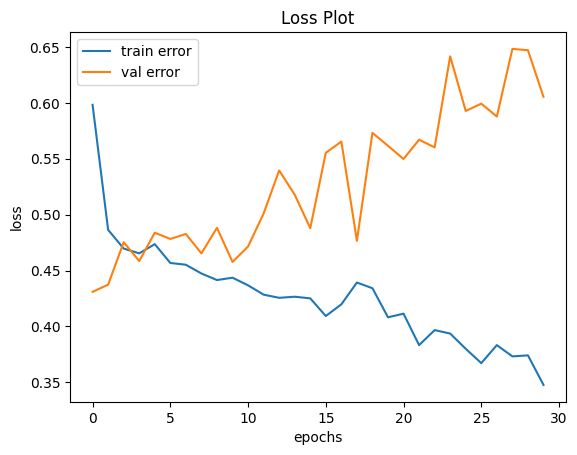

In [96]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [97]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.7987012987012987


## 2. 드롭아웃 사용해서 성능비교 해 볼 것

In [98]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

inputs = Input(shape =(8, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer0 = Dropout(0.5)(layer0)
layer1 = Dense(16, activation = "relu")(layer0)
layer1 = Dropout(0.5)(layer1)
prediction = Dense(2, activation = "sigmoid")(layer1)

model2 = Model(inputs = inputs, outputs = prediction)

model2.compile(Adam(learning_rate = 0.04), 'binary_crossentropy', metrics = ['accuracy'])

model2.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450 (1.76 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
import numpy as np

model_history=model2.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6268 - loss: 0.6856 - val_accuracy: 0.7792 - val_loss: 0.4556
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6719 - loss: 0.5929 - val_accuracy: 0.7922 - val_loss: 0.5120
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6761 - loss: 0.5609 - val_accuracy: 0.7922 - val_loss: 0.4578
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7126 - loss: 0.5750 - val_accuracy: 0.7792 - val_loss: 0.4895
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6761 - loss: 0.5647 - val_accuracy: 0.7532 - val_loss: 0.4716
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6500 - loss: 0.5629 - val_accuracy: 0.6948 - val_loss: 0.5072
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6638 - loss: 0.5896 - val_accuracy: 0.7143 - val_loss: 0.5082
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.5471 - val_accuracy: 0.7597 - val_loss

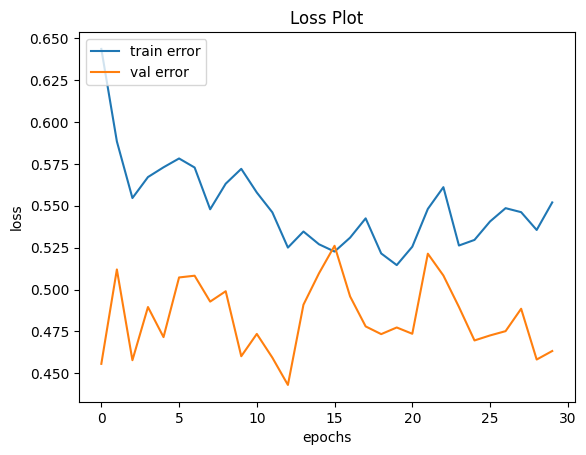

In [100]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [101]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.7987012987012987


## 3. 조기종료 사용해볼 것

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8246 - loss: 0.3543 - val_accuracy: 0.7987 - val_loss: 0.6305
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8419 - loss: 0.3385 - val_accuracy: 0.7922 - val_loss: 0.6820
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


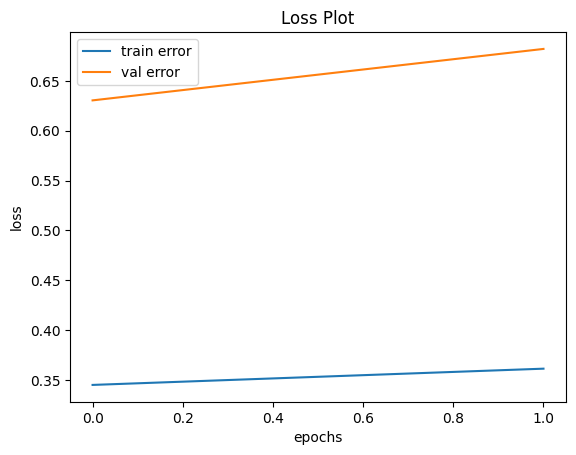

In [102]:
from keras.callbacks import EarlyStopping
import numpy as np

early_stopping = EarlyStopping()

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test), callbacks=[early_stopping])
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [103]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.7922077922077922


# 11) PCA 사용해서 결과값 비교하기

## 1. n = 2

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # n_components에 원하는 주성분 개수를 입력
X_pca_2 = pca.fit_transform(X)

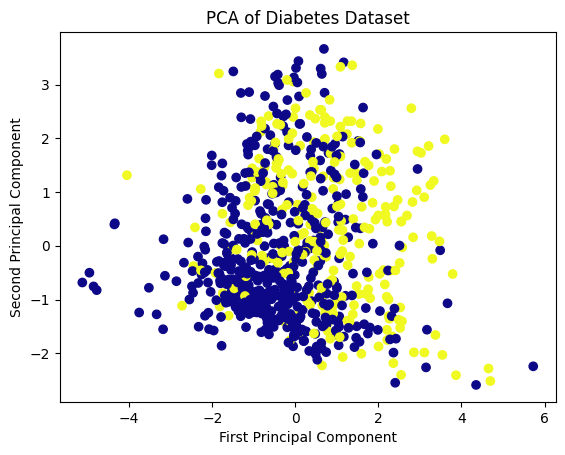

In [105]:
import matplotlib.pyplot as plt

plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c = Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Diabetes Dataset')
plt.show()

In [106]:
from keras.models import Sequential

# split X_train, Y_train, X_test, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_2, Y_encoded, test_size = 0.2, random_state = 0)

# Define Model
model = Sequential()

model.add(Dense(16, input_shape=(2,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)

print()
print("Score :",  scores)

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6369 - loss: 0.6538 - val_accuracy: 0.7468 - val_loss: 0.4947
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7133 - loss: 0.5755 - val_accuracy: 0.7532 - val_loss: 0.4947
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7107 - loss: 0.5442 - val_accuracy: 0.7597 - val_loss: 0.5013
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7113 - loss: 0.5484 - val_accuracy: 0.7468 - val_loss: 0.5020
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.5337 - val_accuracy: 0.7532 - val_loss: 0.5018
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7397 - loss: 0.5400 - val_accuracy: 0.7468 - val_loss: 0.4946
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.5256 - val_accuracy: 0.7597 - val_loss: 0.4991
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7116 - loss: 0.5503 - val_accuracy: 0.7597 - val_loss: 0.4936
Ep

## 2. n = 3

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # n_components에 원하는 주성분 개수를 입력
X_pca_3 = pca.fit_transform(X)

In [108]:
from keras.models import Sequential

# split X_train, Y_train, X_test, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_3, Y_encoded, test_size = 0.2, random_state = 0)

# Define Model
model = Sequential()

model.add(Dense(16, input_shape=(3,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)

print()
print("Score :",  scores)

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6379 - loss: 0.6395 - val_accuracy: 0.7792 - val_loss: 0.4779
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7412 - loss: 0.5254 - val_accuracy: 0.7727 - val_loss: 0.4616
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7483 - loss: 0.5261 - val_accuracy: 0.7532 - val_loss: 0.4578
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7539 - loss: 0.5112 - val_accuracy: 0.7532 - val_loss: 0.4521
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7154 - loss: 0.5665 - val_accuracy: 0.7597 - val_loss: 0.4563
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7340 - loss: 0.5181 - val_accuracy: 0.7532 - val_loss: 0.4560
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7858 - loss: 0.4759 - val_accuracy: 0.7792 - val_loss: 0.4746
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7536 - loss: 0.5013 - val_accuracy: 0.7727 - val_loss: 0.4543
Ep

## 3. n = 4

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)  # n_components에 원하는 주성분 개수를 입력
X_pca_4 = pca.fit_transform(X)

In [110]:
from keras.models import Sequential

# split X_train, Y_train, X_test, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_4, Y_encoded, test_size = 0.2, random_state = 0)

# Define Model
model = Sequential()

model.add(Dense(16, input_shape=(4,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)

print()
print("Score :",  scores)

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5986 - loss: 0.6631 - val_accuracy: 0.7662 - val_loss: 0.4903
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7142 - loss: 0.5532 - val_accuracy: 0.7532 - val_loss: 0.4781
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.5202 - val_accuracy: 0.7597 - val_loss: 0.4661
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7443 - loss: 0.5368 - val_accuracy: 0.7597 - val_loss: 0.4642
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7370 - loss: 0.5369 - val_accuracy: 0.7532 - val_loss: 0.4623
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.5057 - val_accuracy: 0.7403 - val_loss: 0.4583
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7698 - loss: 0.5043 - val_accuracy: 0.7532 - val_loss: 0.4614
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7773 - loss: 0.5041 - val_accuracy: 0.7597 - val_loss: 0.4526
Ep

## 4. n = 5

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # n_components에 원하는 주성분 개수를 입력
X_pca_5 = pca.fit_transform(X)

In [112]:
from keras.models import Sequential

# split X_train, Y_train, X_test, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_5, Y_encoded, test_size = 0.2, random_state = 0)

# Define Model
model = Sequential()

model.add(Dense(16, input_shape=(5,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)

print()
print("Score :",  scores)

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4966 - loss: 0.7179 - val_accuracy: 0.7727 - val_loss: 0.5452
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7251 - loss: 0.5577 - val_accuracy: 0.7922 - val_loss: 0.4494
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7751 - loss: 0.4962 - val_accuracy: 0.7792 - val_loss: 0.4465
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7457 - loss: 0.5115 - val_accuracy: 0.7857 - val_loss: 0.4485
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5404 - val_accuracy: 0.7727 - val_loss: 0.4548
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.4893 - val_accuracy: 0.7922 - val_loss: 0.4438
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7728 - loss: 0.5069 - val_accuracy: 0.7792 - val_loss: 0.4466
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7759 - loss: 0.4882 - val_accuracy: 0.7662 - val_loss: 0.4550
Ep

## 5. n = 6

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)  # n_components에 원하는 주성분 개수를 입력
X_pca_6 = pca.fit_transform(X)

In [114]:
from keras.models import Sequential

# split X_train, Y_train, X_test, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_6, Y_encoded, test_size = 0.2, random_state = 0)

# Define Model
model = Sequential()

model.add(Dense(16, input_shape=(6,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)

print()
print("Score :",  scores)

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5511 - loss: 0.6818 - val_accuracy: 0.7597 - val_loss: 0.5369
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7666 - loss: 0.5335 - val_accuracy: 0.7727 - val_loss: 0.4640
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7728 - loss: 0.4899 - val_accuracy: 0.7922 - val_loss: 0.4563
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7689 - loss: 0.4733 - val_accuracy: 0.7987 - val_loss: 0.4402
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7523 - loss: 0.4933 - val_accuracy: 0.7987 - val_loss: 0.4449
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7681 - loss: 0.4767 - val_accuracy: 0.8182 - val_loss: 0.4398
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7682 - loss: 0.4647 - val_accuracy: 0.8182 - val_loss: 0.4388
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7810 - loss: 0.4612 - val_accuracy: 0.7987 - val_loss: 0.4430
Ep

## 6. n = 7

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)  # n_components에 원하는 주성분 개수를 입력
X_pca_7 = pca.fit_transform(X)

In [116]:
from keras.models import Sequential

# split X_train, Y_train, X_test, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_7, Y_encoded, test_size = 0.2, random_state = 0)

# Define Model
model = Sequential()

model.add(Dense(16, input_shape=(7,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)

print()
print("Score :",  scores)

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6838 - loss: 0.6141 - val_accuracy: 0.8052 - val_loss: 0.4396
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7588 - loss: 0.4921 - val_accuracy: 0.8182 - val_loss: 0.4165
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4797 - val_accuracy: 0.8052 - val_loss: 0.4211
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.4714 - val_accuracy: 0.8052 - val_loss: 0.4175
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7874 - loss: 0.4460 - val_accuracy: 0.7922 - val_loss: 0.4359
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7944 - loss: 0.4553 - val_accuracy: 0.8117 - val_loss: 0.4255
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7941 - loss: 0.4534 - val_accuracy: 0.7922 - val_loss: 0.4272
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8058 - loss: 0.4337 - val_accuracy: 0.7662 - val_loss: 0.4338
Ep